In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
a = pd.read_csv('/content/Housing.csv')
print(a)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [21]:
print(a.head(10))

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

In [22]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [23]:
print(a.shape)

(545, 13)


In [24]:
print(a.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [25]:
print(a.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [26]:
print(a['furnishingstatus'].value_counts())

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


Axes(0.125,0.11;0.775x0.77)


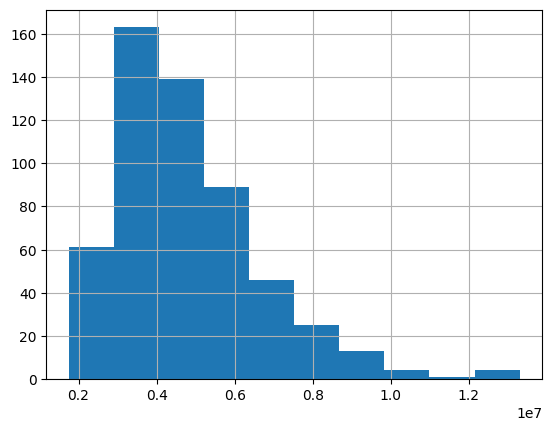

In [27]:
print(a['price'].hist())

Axes(0.125,0.11;0.775x0.77)


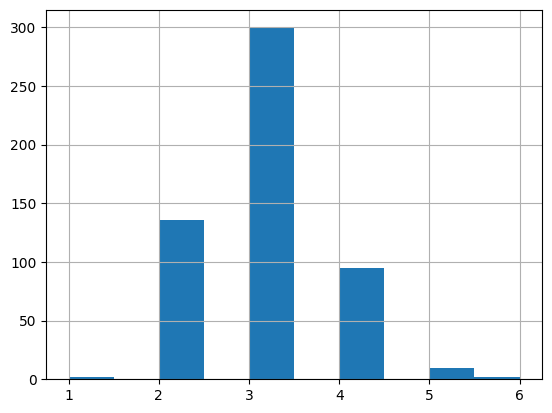

In [28]:
print(a['bedrooms'].hist())

Axes(0.125,0.11;0.775x0.77)


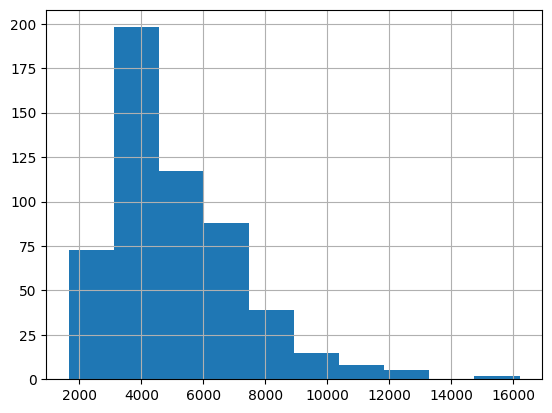

In [29]:
print(a['area'].hist())

Axes(0.125,0.11;0.775x0.77)


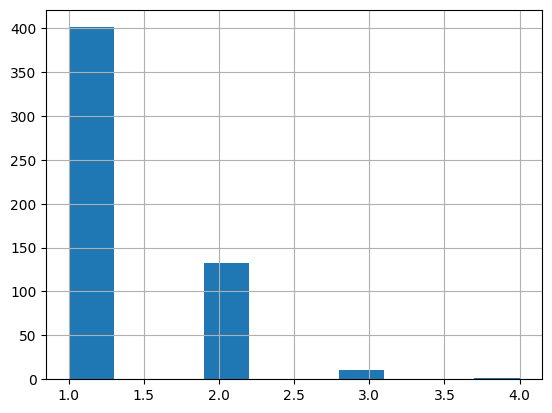

In [30]:
print(a['bathrooms'].hist())

Axes(0.125,0.11;0.775x0.77)


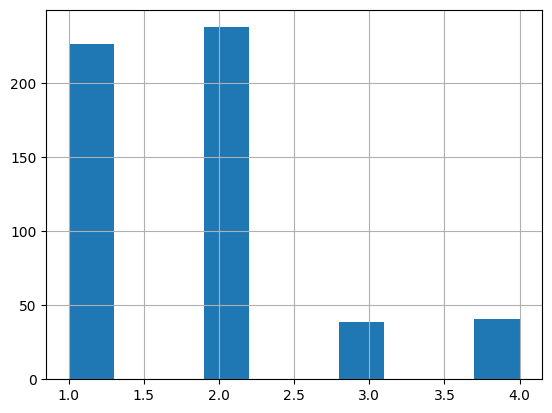

In [31]:
print(a['stories'].hist())

Axes(0.125,0.11;0.775x0.77)


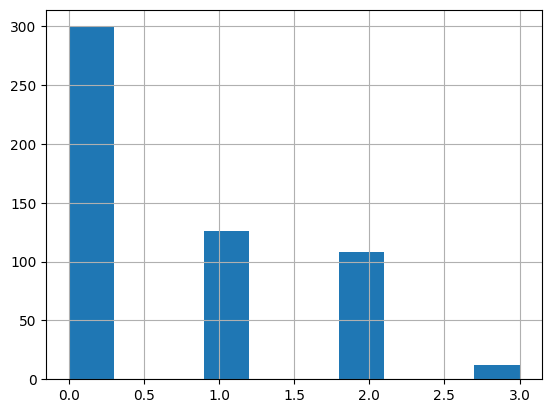

In [32]:
print(a['parking'].hist())

In [33]:
counter = 0
rs, cs = a.shape
a.drop_duplicates(inplace=True)
if a.shape == (rs, cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs - a.shape[0]}')
categ = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
le = LabelEncoder()
a[categ] = a[categ].apply(le.fit_transform)


Inference: The dataset doesn't have any duplicates


In [34]:
print(a.corr())

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

<Axes: >

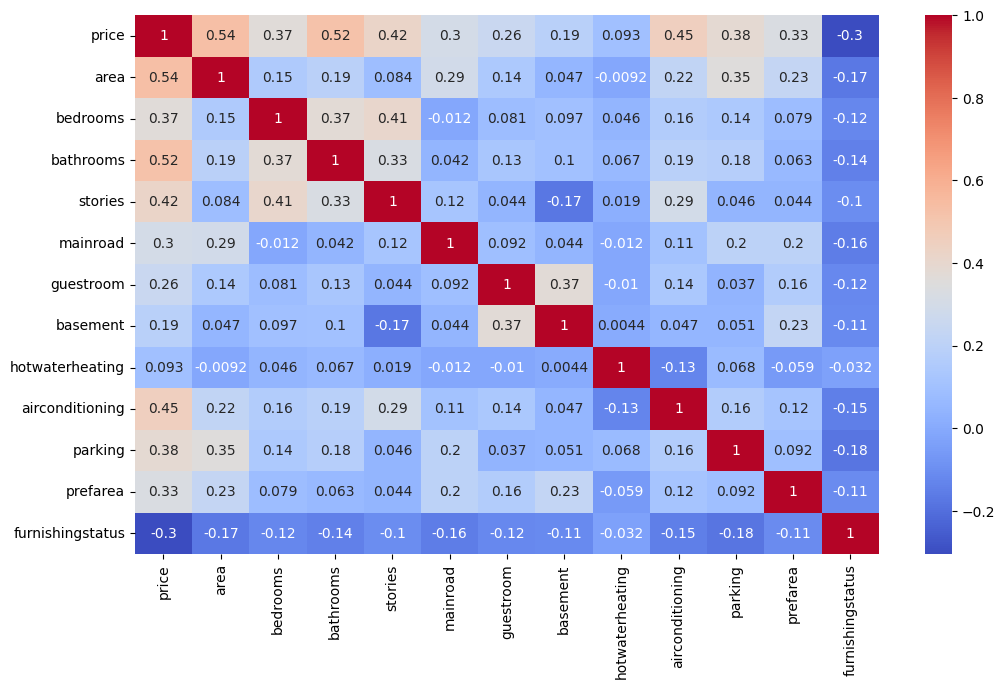

In [35]:
#correlation matrix
corr = a.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [36]:
X = a.drop(['price'], axis=1)
y = a['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_predict_linear = model_linear.predict(X_test)
score_linear = r2_score(y_test, y_predict_linear)
mae_linear = mean_absolute_error(y_test, y_predict_linear)

In [37]:
print("Linear Regression - R2 Score:", score_linear)
print("Linear Regression - Mean Absolute Error:", mae_linear)

Linear Regression - R2 Score: 0.6435419628959105
Linear Regression - Mean Absolute Error: 925543.5483156566


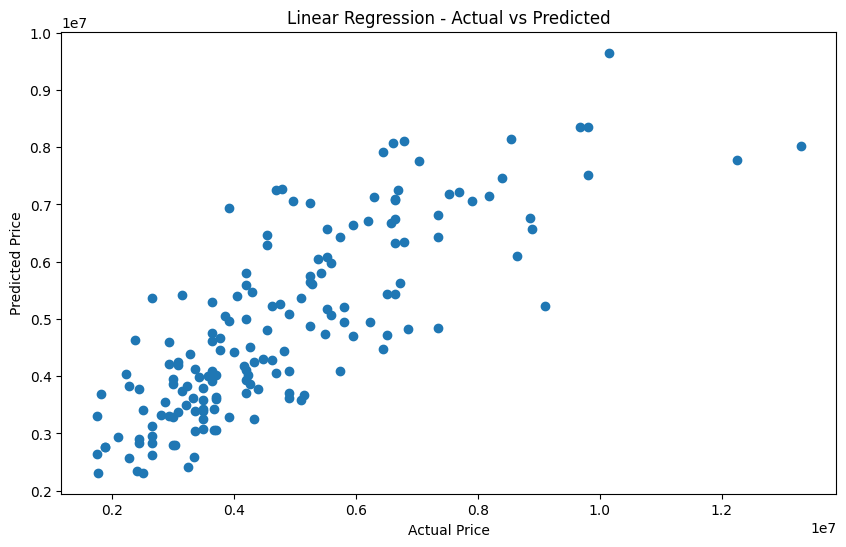

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_linear)
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [39]:
# Train Neural Network using TensorFlow
model_tf = Sequential()
model_tf.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_tf.add(Dense(32, activation='relu'))
model_tf.add(Dense(1, activation='linear'))
model_tf.compile(loss='mean_squared_error', optimizer='adam')
model_tf.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
y_predict_nn = model_tf.predict(X_test).flatten()
score_nn = r2_score(y_test, y_predict_nn)
mae_nn = mean_absolute_error(y_test, y_predict_nn)

6/6 [==============================] - 0s 3ms/step


In [40]:
print("Neural Network - R2 Score:", score_nn)
print("Neural Network - Mean Absolute Error:", mae_nn)

Neural Network - R2 Score: -0.8463008150405209
Neural Network - Mean Absolute Error: 2275176.9153963416


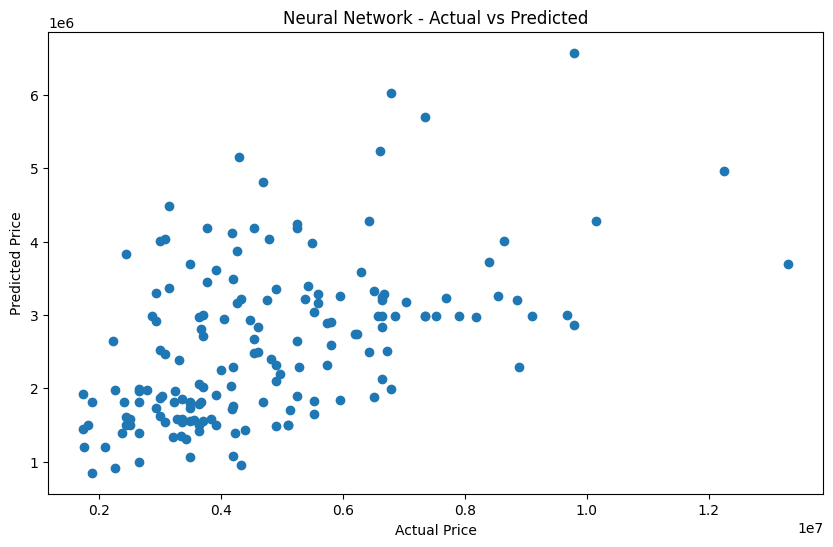

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_nn)
plt.title('Neural Network - Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()